In [108]:
%matplotlib notebook
import datetime

In [31]:
#dt=datetime.datetime(year=2019,month=3,day=29,hour=10,minute=26)

# dt=datetime.datetime(year=2019,month=3,day=29,hour=10,minute=26)

In [50]:
dt

datetime.datetime(2019, 3, 29, 10, 26)

In [51]:
print(dt)

2019-03-29 10:26:00


In [52]:
dt.day

29

In [53]:
import pandas as pd

In [54]:
ts=pd.Timestamp('2019-3-29')

In [55]:
ts

Timestamp('2019-03-29 00:00:00')

# ts=pd.Timestamp('2019-3-29')

# Timestamp 就是一个时间戳

In [56]:
ts.month

3

In [57]:
ts.day

29

In [58]:
ts + pd.Timedelta('5 days')

Timestamp('2019-04-03 00:00:00')

In [59]:
tt= pd.to_datetime('2019-3-29')
tt

Timestamp('2019-03-29 00:00:00')

In [60]:
tt= pd.to_datetime('29/3/2019')
tt

Timestamp('2019-03-29 00:00:00')

# 构造时间的方法：

##    tt= pd.to_datetime('2019-3-29')

##    ts=pd.Timestamp('2019-3-29')

# -----------------------------------------------------------------------------------

In [61]:
s = pd.Series(['2019-03-29 00:00:00','2019-03-29 00:00:00','2019-03-29 00:00:00'])

In [62]:
s

0    2019-03-29 00:00:00
1    2019-03-29 00:00:00
2    2019-03-29 00:00:00
dtype: object

# 这时候生成的是一个object格式

In [63]:
aa=pd.to_datetime(s)
aa

0   2019-03-29
1   2019-03-29
2   2019-03-29
dtype: datetime64[ns]

# 现在就是一个datetime格式

In [64]:
aa.dt.day

0    29
1    29
2    29
dtype: int64

# datetime.dt.day

In [65]:
aa.dt.year

0    2019
1    2019
2    2019
dtype: int64

In [66]:
aa.dt.weekday

0    4
1    4
2    4
dtype: int64

# 下面直接构造时间序列

In [67]:
pd.Series(pd.date_range(start='2019-3-29',periods=5))

0   2019-03-29
1   2019-03-30
2   2019-03-31
3   2019-04-01
4   2019-04-02
dtype: datetime64[ns]

In [68]:
pd.Series(pd.date_range(start='2019-3-29',periods=5,freq='12H'))

0   2019-03-29 00:00:00
1   2019-03-29 12:00:00
2   2019-03-30 00:00:00
3   2019-03-30 12:00:00
4   2019-03-31 00:00:00
dtype: datetime64[ns]

# ----------------------------------------------------------------------------------

In [69]:
data=pd.read_csv('./data/flowdata.csv')

In [72]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [74]:
data['Time'][:5]

0    2009-01-01 00:00:00
1    2009-01-01 03:00:00
2    2009-01-01 06:00:00
3    2009-01-01 09:00:00
4    2009-01-01 12:00:00
Name: Time, dtype: object

# 上面的时间一栏是字符串格式的，将其转换成datatime

In [76]:
data['Time']=pd.to_datetime(data['Time'])

In [78]:
data[:5]

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [79]:
data = data.set_index('Time')

In [81]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


# 对于上面的表格可以进行如下操作

In [83]:
data[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


###  data[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')]

## 这样可以截取表格中一段数据

In [86]:
data[('2012-01-01 09:00'):('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


# 把上面的pd.Timestamp去掉也可以取出

# 查看最后几个数据

In [87]:
data.tail()

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


# 如果想查看具体某一年的可以如下操作

In [89]:
data['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


In [94]:
data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Time', length=11697)

In [96]:
data['2012-01':'2012-02'][:5]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750


In [97]:
data[data.index.month ==1][:5]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [99]:
data[(data.index.hour > 8) &(data.index.hour < 12)][:5]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-05 09:00:00,0.161500,0.114583,0.021583


In [103]:
data.between_time('8:00','12:00')[:5]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-02 12:00:00,0.147833,0.101917,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833


# 时间序列的重采样

In [104]:
data.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


# 这个挺难啊
# data.resample('D')               (D 是对天的操作)

# 重采样时将每一天的进行了统计

In [105]:
data.resample('M').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.517864,0.536660,0.045597
2009-02-28,0.516847,0.529987,0.047238
2009-03-31,0.373157,0.383172,0.037508
2009-04-30,0.163182,0.129354,0.021356
2009-05-31,0.178588,0.160616,0.020744


In [106]:
data.resample('M').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,9.046667,9.353333,0.637500
2009-02-28,5.978333,6.283333,0.432167
2009-03-31,2.485000,2.708333,0.189667
2009-04-30,0.424833,0.437083,0.079917
2009-05-31,5.990833,6.295833,0.569083


In [107]:
data.resample('3M').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,9.046667,9.353333,0.637500
2009-04-30,5.978333,6.283333,0.432167
2009-07-31,5.990833,6.295833,0.569083
2009-10-31,1.422833,1.951667,0.209500
2010-01-31,2.440000,2.975833,0.227917


<IPython.core.display.Javascript object>


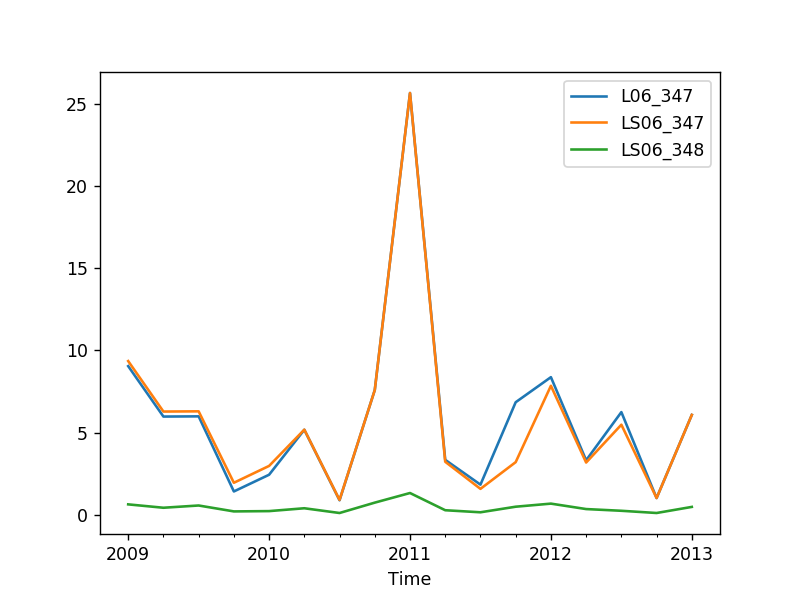

In [109]:
data.resample('3M').max().plot()